
## Stroke Prediction Dataset
### 11 clinical features for predicting stroke events

In [1]:
# importing the needed df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
sns.set_theme(style="whitegrid")
from dython.model_utils import metric_graph
import os


In [2]:
df_comb = pd.read_csv("train_strokes.csv")
df_comb

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
df_comb.drop('id', axis = 1, inplace = True)

In [4]:
df_comb[df_comb.duplicated(subset= ["gender","age","hypertension","heart_disease","ever_married","work_type",\
    "Residence_type","avg_glucose_level","bmi","smoking_status","stroke"],keep="first")]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


df_comb.drop_duplicates(subset= ["gender","age","hypertension","heart_disease","ever_married","work_type",\
    "Residence_type","avg_glucose_level","bmi","smoking_status","stroke"], inplace = True)

In [5]:
df_comb.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [6]:
df_comb.bmi.mean()

28.605038390004296

In [7]:
df_comb.bmi.fillna(df_comb.bmi.mean(), inplace = True)

In [8]:
df_comb.isna().sum()


gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [9]:
# drop smoking status is null
df_comb.smoking_status.fillna(np.nan, inplace = True)

In [10]:
df_comb.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [11]:
df_comb.dropna(how = "any", inplace = True)

In [12]:
df_comb.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
age_hyper =  df_comb.loc[:,["age","gender"]]
age_hyper

,age,gender
1,58.0,Male
3,70.0,Female
6,52.0,Female
7,75.0,Female
8,32.0,Female
...,...,...
43395,10.0,Female
43396,56.0,Female
43397,82.0,Female
43398,40.0,Male


In [14]:
age_hyper['age_cat'] = age_hyper.age.apply(lambda x :  "0-2" if 0 <= x<2 else
                                            "2-5" if 2<= x<= 5 else
                                            "6-13" if 5< x< 13 else
                                            "13-18" if 13<= x< 18 else
                                            "18-30" if 18<= x< 30 else
                                            "30-40" if 30<= x< 40 else
                                            "40-50" if 40<= x< 50 else
                                            "50-65" if 50<= x< 65 else
                                            "65+" if x>= 65 else "not known"
                                )

In [15]:
pivot_age = age_hyper.pivot_table(index = 'age_cat', columns='gender', values="age", aggfunc= 'count')
pivot_age

gender,Female,Male,Other
age_cat,,,
13-18,597.0,489.0,NaN
18-30,3227.0,1529.0,3.0
30-40,2754.0,1578.0,1.0
40-50,3090.0,2003.0,2.0
50-65,4693.0,3252.0,1.0
6-13,175.0,160.0,2.0
65+,3830.0,2722.0,NaN


<AxesSubplot:xlabel='age_cat'>

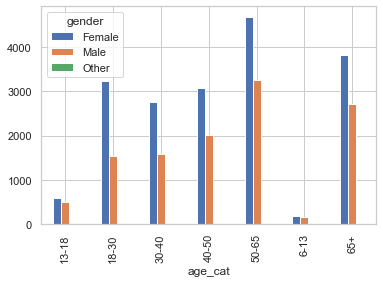

In [16]:
pivot_age.plot(kind = 'bar')

In [17]:
gender_stat =   df_comb.gender.value_counts().to_frame()
gender_stat

,gender
Female,18366
Male,11733
Other,9


<AxesSubplot:ylabel='gender'>

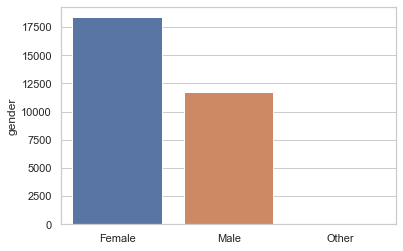

In [18]:

sns.barplot(data = gender_stat, x = gender_stat.index, y = gender_stat['gender'] )

In [19]:
df_comb.to_csv("master_df.csv", index = False)

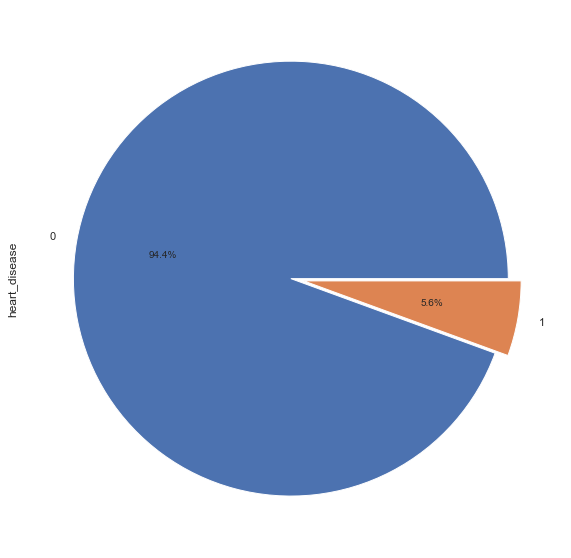

In [20]:
df_comb.heart_disease.value_counts().plot(kind= "pie", autopct = "%.1f%%", figsize = (10,10), explode = (0.01,0.05));

In [21]:
#  Ssmoking with heart diseas
married_stroke = df_comb.loc[:,["ever_married","stroke"]].groupby("ever_married").count()
married_stroke

,stroke
ever_married,
No,7557
Yes,22551


<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

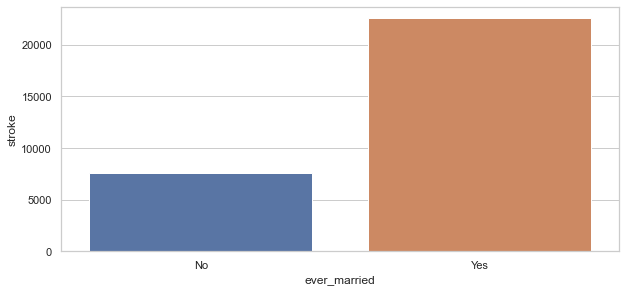

In [22]:
fig,(ax1) = plt.subplots(figsize = (10,4.5))
sns.barplot(data = married_stroke, y = "stroke", x = married_stroke.index, ax= ax1)

<AxesSubplot:xlabel='bmi', ylabel='age'>

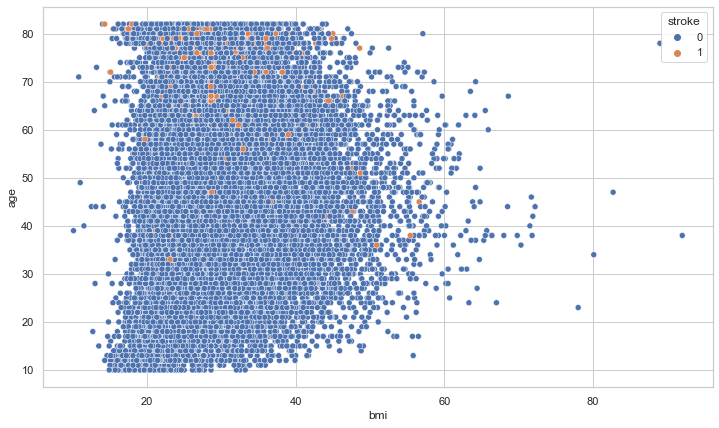

In [23]:
fig, ax = plt.subplots( figsize = (12,7))
sns.scatterplot( data = df_comb, x  = df_comb.bmi,  y =df_comb.age, hue = 'stroke', ax = ax , palette = "deep")

<AxesSubplot:>

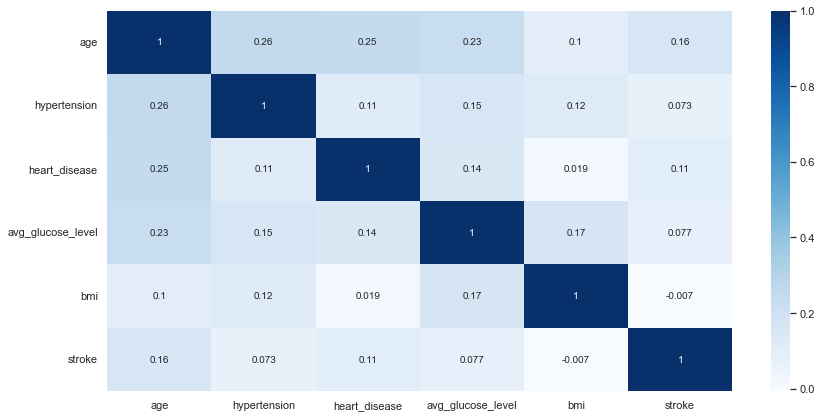

In [24]:
# feature correlation
fig,ax =plt.subplots(figsize = (14,7))
feature_check =sns.heatmap( df_comb.corr(), cmap = "Blues", annot = True)
feature_check

## Preprocessing , change strings to numeric with OneHotEncoder

In [25]:
df_comb.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [26]:
# splitting the dataset into X an y
X =  df_comb.drop(["stroke","ever_married","work_type"], axis =1)
y =  df_comb.stroke
X.shape, y.shape

((30108, 8), (30108,))

from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
y = Le.fit_transform(y)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

features = ['gender','Residence_type','smoking_status']

transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown ='ignore'),features),
    remainder='passthrough')

transformedX = transformer.fit_transform(X)
pd.DataFrame(transformedX).head(20)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,58.0,1.0,0.0,87.96,39.2
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,70.0,0.0,0.0,69.04,35.9
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,52.0,0.0,0.0,77.59,17.7
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,75.0,0.0,1.0,243.53,27.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,32.0,0.0,0.0,77.67,32.3
5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,74.0,1.0,0.0,205.84,54.6
6,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,79.0,0.0,1.0,57.08,22.0
7,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,37.0,0.0,0.0,162.96,39.4
8,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37.0,0.0,0.0,73.50,26.1
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,40.0,0.0,0.0,95.04,42.4


In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(transformedX, y)

In [29]:
from sklearn.model_selection import train_test_split , cross_val_score
X_train,X_test ,y_train ,y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = 1000)  
X_train.shape ,X_test.shape  ,y_train.shape ,y_test.shape

((41258, 13), (17682, 13), (41258,), (17682,))

# Import needed estimators and libraries

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

 Training -Set Accuracy score is 76.80%
 Testing - Set Accuracy score is 76.47%
[[6533 2369]
 [1791 6989]]


              precision    recall  f1-score   support

           0       0.78      0.73      0.76      8902
           1       0.75      0.80      0.77      8780

    accuracy                           0.76     17682
   macro avg       0.77      0.76      0.76     17682
weighted avg       0.77      0.76      0.76     17682



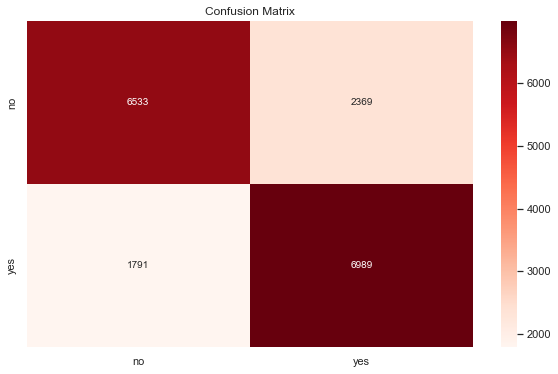

In [31]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression( max_iter=1000, random_state = 100)
lgr.fit(X_train,y_train)
print(f' Training -Set Accuracy score is {lgr.score(X_train, y_train)*100:.2f}%')
print(f' Testing - Set Accuracy score is {lgr.score(X_test, y_test)*100:.2f}%')
y_pred1 = lgr.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)

print(cm1)

print()
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(pd.DataFrame(cm1, columns =['no',"yes"], \
    index = ["no", "yes"]),cmap = 'Reds',xticklabels = True, annot =True,fmt = "d", ax = ax)
ax.set(title ="Confusion Matrix");

print()
cr1 = classification_report(y_test, y_pred1)
print(cr1)

 Training -Set Accuracy score is 97.36%
 Testing - Set Accuracy score is 95.24%
       no   yes
no   8081   821
yes    20  8760

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      8902
           1       0.91      1.00      0.95      8780

    accuracy                           0.95     17682
   macro avg       0.96      0.95      0.95     17682
weighted avg       0.96      0.95      0.95     17682



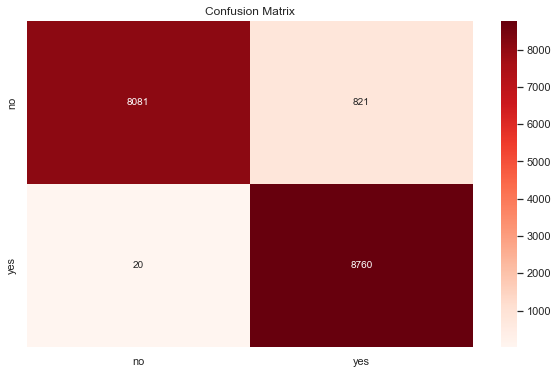

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=1,metric='minkowski',weights='uniform')
knn.fit(X_train,y_train)

print(f' Training -Set Accuracy score is {knn.score(X_train, y_train)*100:.2f}%')
print(f' Testing - Set Accuracy score is {knn.score(X_test, y_test)*100:.2f}%')
y_pred2 = knn.predict(X_test)


confusion_mx = confusion_matrix(y_test, y_pred2)
cm2= pd.DataFrame(confusion_mx, index =["no", "yes"], columns =["no", "yes"])
print(cm2)


fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(cm2,cmap = 'Reds',xticklabels = True, annot =True,fmt = "d", ax = ax)
ax.set(title ="Confusion Matrix")

print()
cr2 = classification_report(y_test, y_pred2)
print(cr2)

 Training -Set Accuracy score is 100.00%
 Testing - Set Accuracy score is 98.72%
       no   yes
no   8890    12
yes   215  8565

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8902
           1       1.00      0.98      0.99      8780

    accuracy                           0.99     17682
   macro avg       0.99      0.99      0.99     17682
weighted avg       0.99      0.99      0.99     17682



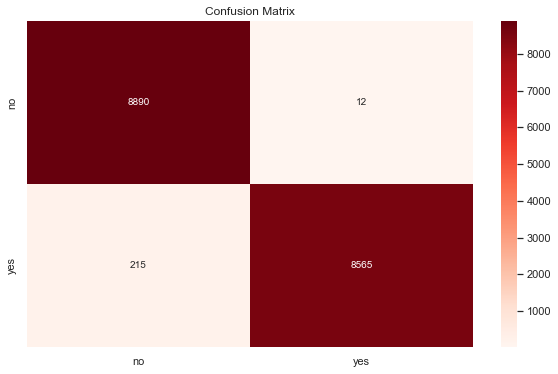

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = 1)
rfc.fit(X_train,y_train)

print(f' Training -Set Accuracy score is {rfc.score(X_train, y_train)*100:.2f}%')
print(f' Testing - Set Accuracy score is {rfc.score(X_test, y_test)*100:.2f}%')
y_pred3 = rfc.predict(X_test)


confusion_mx = confusion_matrix(y_test, y_pred3)
cm3 = pd.DataFrame(confusion_mx, index =["no", "yes"], columns =["no", "yes"])
print(cm3)


fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(cm3,cmap = 'Reds',xticklabels = True, annot =True,fmt = "d", ax = ax)
ax.set(title ="Confusion Matrix")

print()
cr3 = classification_report(y_test, y_pred3)
print(cr3)

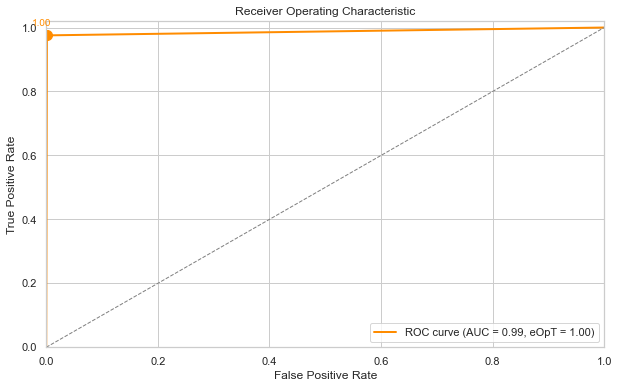

{'0': {'auc': {'val': 0.9870822583955181, 'naive': 0.5},
  'eopt': {'val': 1, 'x': 0.0013480116827679174, 'y': 0.9755125284738041}},
 'ax': <AxesSubplot:title={'center':'Receiver Operating Characteristic'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>}

In [34]:
fig, ax = plt.subplots(figsize = (10,6))
metric_graph(y_test, y_pred3, metric='roc', ax= ax)

In [35]:
cm3.to_csv("conf_max_df.csv", index = False)

## Save the model

In [36]:
import pickle
pickle.dump(lgr, open("lgr_pkl", "wb"))
pickle.dump(knn, open("knn_pkl", "wb"))
pickle.dump(rfc, open("rfc_pkl", "wb"))

In [37]:
lgr.predict_proba(X_test)

array([[0.87002354, 0.12997646],
       [0.69965018, 0.30034982],
       [0.60987946, 0.39012054],
       ...,
       [0.31340032, 0.68659968],
       [0.65337545, 0.34662455],
       [0.98182323, 0.01817677]])